# 3C Rrs Calculation

In [1]:
import os
import sys
lib_path = os.path.abspath(os.path.join(os.path.abspath(''), 'functions/'))
sys.path.append(lib_path)
lib_path = os.path.abspath(os.path.join(os.path.abspath(''), 'rrs_model_3C-master/'))
sys.path.append(lib_path)
# need to append our functions dir to the path! 
import dalecLoad as dl

import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import spectralConv
import seaborn as sns

import datetime

from scipy.signal import savgol_filter
from scipy import interpolate


from rrs_model_3C import rrs_model_3C

import lmfit as lm

In [2]:
spect_wavelengths = dl.load_DALEC_spect_wavelengths('data/calibrated_full/2023_good_files/LOG_0013.dtf')

In [3]:
log = dl.load_DALEC_dir('data/calibrated_full/2023_good_files/',
                        file_names=['LOG_0008.dtf',
                                    'LOG_0017.dtf',
                                    'LOG_0027.dtf',
                                    'LOG_0037.dtf',
                                    'LOG_0047.dtf',
                                    'LOG_0053.dtf',
                                    'LOG_0067.dtf',
                                    'LOG_0087.dtf',
                                    'LOG_0097.dtf',])

loading ... data/calibrated_full/2023_good_files/LOG_0008.dtf
loading ... data/calibrated_full/2023_good_files/LOG_0017.dtf
loading ... data/calibrated_full/2023_good_files/LOG_0027.dtf
loading ... data/calibrated_full/2023_good_files/LOG_0037.dtf
loading ... data/calibrated_full/2023_good_files/LOG_0047.dtf
loading ... data/calibrated_full/2023_good_files/LOG_0053.dtf
loading ... data/calibrated_full/2023_good_files/LOG_0067.dtf
loading ... data/calibrated_full/2023_good_files/LOG_0087.dtf
loading ... data/calibrated_full/2023_good_files/LOG_0097.dtf


In [4]:
log.columns

Index([' Gearpos', 'Pitch', 'Roll', 'Voltage', 'Solar Elev', 'Lon',
       'Solar Azi', 'GPS_Fix', 'Integration Time', 'Relaz', 'Saturation Flag',
       'Heading', 'Temp', 'Lat', 'Spectral Magnitude'],
      dtype='object')

In [5]:
log.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39405000 entries, ('Ed', 21, Timestamp('2023-07-08 08:00:15.176000')) to ('Lu', 220, Timestamp('2023-09-28 13:59:58.048000'))
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0    Gearpos            object 
 1   Pitch               object 
 2   Roll                object 
 3   Voltage             object 
 4   Solar Elev          float64
 5   Lon                 object 
 6   Solar Azi           object 
 7   GPS_Fix             object 
 8   Integration Time    object 
 9   Relaz               object 
 10  Saturation Flag     int64  
 11  Heading             object 
 12  Temp                object 
 13  Lat                 object 
 14  Spectral Magnitude  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 4.7+ GB


In [6]:
log.select_dtypes(['number']).columns

Index(['Solar Elev', 'Saturation Flag', 'Spectral Magnitude'], dtype='object')

In [7]:
log_re = dl.resampleMultiLog(log.select_dtypes(['number']), freq='5min')

In [8]:
log_re.columns

Index(['Solar Elev', 'Saturation Flag', 'Spectral Magnitude'], dtype='object')

In [9]:
log_Rrs = dl.uniform_grid_spectra_multi(log_re, spect_wavelengths=spect_wavelengths, resample_to_SDs=False,
                                        Rrs_method='3C')
#log_Rrs.reset_index(inplace=True)

--- 0.14453816413879395 seconds ---
--- 0.09810304641723633 seconds ---
--- 0.08146309852600098 seconds ---
--- 0.09014773368835449 seconds ---
--- 0.0849919319152832 seconds ---
--- 0.20911622047424316 seconds ---
--- 0.1735849380493164 seconds ---
--- 0.10518288612365723 seconds ---
--- 0.08443808555603027 seconds ---
--- 0.09110212326049805 seconds ---
--- 0.20907092094421387 seconds ---
--- 0.21409320831298828 seconds ---
--- 0.061930179595947266 seconds ---
--- 0.06629681587219238 seconds ---
--- 0.07333922386169434 seconds ---
--- 0.06671285629272461 seconds ---
--- 0.05301094055175781 seconds ---
--- 0.2044057846069336 seconds ---
--- 0.19237017631530762 seconds ---
--- 0.1419210433959961 seconds ---
--- 0.11040210723876953 seconds ---
--- 0.05934286117553711 seconds ---
--- 0.11312007904052734 seconds ---
--- 0.11078023910522461 seconds ---
--- 0.10809206962585449 seconds ---
--- 0.14621996879577637 seconds ---
--- 0.14809870719909668 seconds ---
--- 0.12022590637207031 seconds

--- 0.0690009593963623 seconds ---
--- 0.0794990062713623 seconds ---
--- 0.0850229263305664 seconds ---
--- 0.0882120132446289 seconds ---
--- 0.06895208358764648 seconds ---
--- 0.07632303237915039 seconds ---
--- 0.0653083324432373 seconds ---
--- 0.09003186225891113 seconds ---
--- 0.0737299919128418 seconds ---
--- 0.06315493583679199 seconds ---
--- 0.09531283378601074 seconds ---
--- 0.10373282432556152 seconds ---
--- 0.10501575469970703 seconds ---
--- 0.06116795539855957 seconds ---
--- 0.12052083015441895 seconds ---
--- 0.2182457447052002 seconds ---
--- 0.10612916946411133 seconds ---
--- 0.07250499725341797 seconds ---
--- 0.06961417198181152 seconds ---
--- 0.07685708999633789 seconds ---
--- 0.2463829517364502 seconds ---
--- 0.06501126289367676 seconds ---
--- 0.20914196968078613 seconds ---
--- 0.06803774833679199 seconds ---
--- 0.06252384185791016 seconds ---
--- 0.2009589672088623 seconds ---
--- 0.08270096778869629 seconds ---
--- 0.06530189514160156 seconds ---
-

--- 0.165327787399292 seconds ---
--- 0.07335591316223145 seconds ---
--- 0.18655109405517578 seconds ---
--- 0.1888120174407959 seconds ---
--- 0.1630253791809082 seconds ---
--- 0.15061497688293457 seconds ---
--- 0.18990111351013184 seconds ---
--- 0.19019293785095215 seconds ---
--- 0.2107381820678711 seconds ---
--- 0.14169716835021973 seconds ---
--- 0.18181514739990234 seconds ---
--- 0.07001590728759766 seconds ---
--- 0.06360983848571777 seconds ---
--- 0.15369915962219238 seconds ---
--- 0.12972521781921387 seconds ---
--- 0.10480213165283203 seconds ---
--- 0.21187996864318848 seconds ---
--- 0.11402082443237305 seconds ---
--- 0.09714913368225098 seconds ---
--- 0.18437790870666504 seconds ---
--- 0.20217609405517578 seconds ---
--- 0.16208314895629883 seconds ---
--- 0.14017367362976074 seconds ---
--- 0.19204425811767578 seconds ---
--- 0.05341911315917969 seconds ---
--- 0.18937373161315918 seconds ---
--- 0.13130712509155273 seconds ---
--- 0.11481332778930664 seconds -

In [21]:
log_Rrs_standard = dl.uniform_grid_spectra_multi(log_re, spect_wavelengths=spect_wavelengths, resample_to_SDs=False,
                                        Rrs_method='standard')
log_Rrs_standard.reset_index(inplace=True)
log_Rrs_standard['date'] = log_Rrs_standard.Date.dt.date

In [35]:
log_Rrs_lo_rho = dl.uniform_grid_spectra_multi(log_re, spect_wavelengths=spect_wavelengths, resample_to_SDs=False,
                                        Rrs_method='standard', RHO=0.021)
log_Rrs_lo_rho.reset_index(inplace=True)
log_Rrs_lo_rho['date'] = log_Rrs_lo_rho.Date.dt.date

In [16]:
log_Rrs.reset_index(inplace=True)
log_Rrs['date'] = log_Rrs.Date.dt.date

ValueError: cannot insert level_0, already exists

In [30]:
log_Rrs_standard[log_Rrs_standard.Rrs_median<0]

,Date,Wavelength,Lu_median,Lsky_median,Ed_median,Rrs_median,date
1202,2023-07-08 08:10:00,400.0,0.002030,0.074538,0.335327,-0.000171,2023-07-08
1203,2023-07-08 08:10:00,401.0,0.002086,0.076979,0.346917,-0.000201,2023-07-08
1204,2023-07-08 08:10:00,402.0,0.002141,0.078448,0.357799,-0.000154,2023-07-08
1205,2023-07-08 08:10:00,403.0,0.002196,0.079916,0.368681,-0.000114,2023-07-08
1206,2023-07-08 08:10:00,404.0,0.002248,0.081384,0.374867,-0.000082,2023-07-08
...,...,...,...,...,...,...,...
388923,2023-09-28 13:55:00,476.0,0.002249,0.082708,0.339816,-0.000198,2023-09-28
388924,2023-09-28 13:55:00,477.0,0.002261,0.082778,0.341083,-0.000166,2023-09-28
388925,2023-09-28 13:55:00,478.0,0.002274,0.082849,0.340988,-0.000136,2023-09-28
388926,2023-09-28 13:55:00,479.0,0.002286,0.082660,0.340059,-0.000084,2023-09-28


In [2]:
log_Rrs

NameError: name 'log_Rrs' is not defined

In [39]:
log_Rrs_lo_rho[log_Rrs_lo_rho.Rrs_median<0]

,Date,Wavelength,Lu_median,Lsky_median,Ed_median,Rrs_median,date
1803,2023-07-08 08:15:00,400.0,0.001997,0.097497,0.269710,-0.000188,2023-07-08
1804,2023-07-08 08:15:00,401.0,0.002055,0.100867,0.278973,-0.000225,2023-07-08
1805,2023-07-08 08:15:00,402.0,0.002114,0.102988,0.287687,-0.000170,2023-07-08
1806,2023-07-08 08:15:00,403.0,0.002170,0.105109,0.296401,-0.000125,2023-07-08
1807,2023-07-08 08:15:00,404.0,0.002224,0.107229,0.301216,-0.000094,2023-07-08
...,...,...,...,...,...,...,...
388870,2023-09-28 13:55:00,423.0,0.001365,0.069487,0.255223,-0.000371,2023-09-28
388871,2023-09-28 13:55:00,424.0,0.001377,0.069077,0.254687,-0.000290,2023-09-28
388872,2023-09-28 13:55:00,425.0,0.001389,0.068569,0.252811,-0.000202,2023-09-28
388873,2023-09-28 13:55:00,426.0,0.001401,0.068011,0.250936,-0.000108,2023-09-28


## Rrs 3C is marginally better than the Jiang delta corr?

- note here that NIR wavelengths are dropped more than the blues
- this is what we want (higher magnitude blues and lower magnitudes at NIR)
- but the difference is very marginal and will not really make much difference to the analysis I've been doing (I suspect)
- I haven't plotted the Jiang delta corr here, but have compared with some plots in DALEC_2024.ipynb

Note: can also get some improvement through reducing Rho in the standard Rrs equation. This probably isn't v legit though - I can't find any reason at least based on the classic Mobley 1999 paper that it makes sense to use a lower value...

Now, I could spend a while looking into different ways of calc'ing Rrs, but I think I need to accept that the spectra are inherently a bit off. 

So, I can say - issues with the spectra in 2023 arise from partially submerged aquatic macrophytes, which contribute to the signal - this explains why there is very little reflectance in the blues

However, we know that these macrophytes are present throughout the loch, with some spatial variation. Hence, the Planet superdoves signal will still be affected by this signal.

Why no issue in 2022? - think we got lucky!

Why does chl-a not have any consistency between years? - why does macrophyte presence not increase chl-a? (surely we'd expect the DALEC to overestimate, and planet to underestimate?

Or maybe this is bottom effect? - But can't see how that would change from year to year and still be present during an intensive cyano bloom where chl-a is V high.

## Think I should accept that the DALEC spectra is approx true?


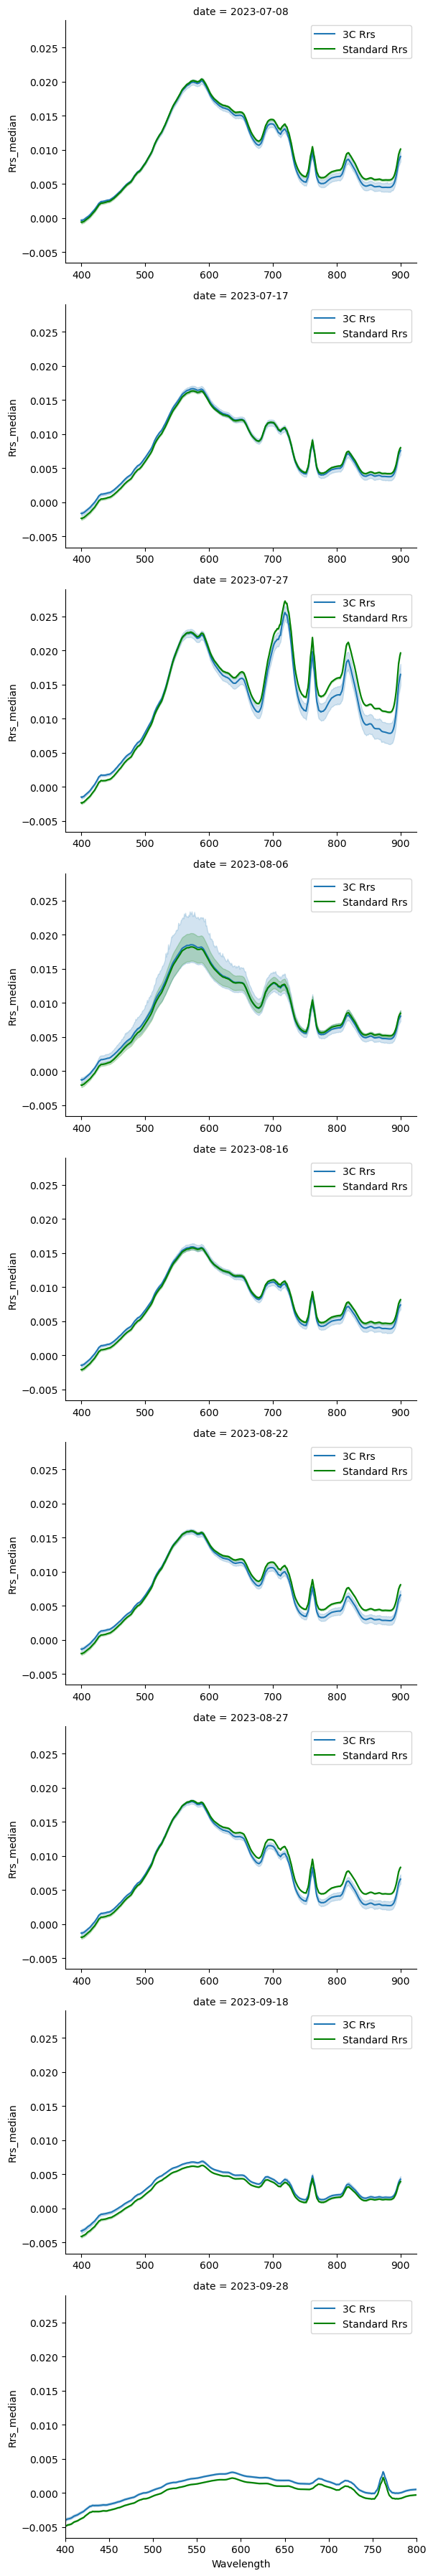

In [47]:
#sns.lineplot(data=log_Rrs, x='Wavelength', y='Rrs_median')
g = sns.relplot(data=log_Rrs.merge(log_Rrs_standard),
                x='Wavelength', y='Rrs_3C_median',
                col='date', kind='line', col_wrap=1, height=4, aspect=1.5,
                facet_kws=dict(sharex=False), label='3C Rrs')

g.map_dataframe(sns.lineplot, x='Wavelength', y='Rrs_median', errorbar='se', color='g', label='Standard Rrs')
plt.xlim(400, 800)
for ax in g.axes.ravel():
    ax.legend()
plt.show()

In [ ]:
# Everything below here is just code dev for implementing the 3C Rrs code

In [160]:
# just test for the first spectrum in the data
# also need to constrain to 400-900 nm
log1 = log_Rrs[(log_Rrs.Date==log_Rrs.Date.unique()[40]) & (log_Rrs.Wavelength<=900)]
log1

,Date,Wavelength,Lu_median,Lsky_median,Ed_median,Rrs_median
24040,2023-09-11 11:20:00,400.0,0.002211,0.045117,0.560364,0.001691
24041,2023-09-11 11:20:00,401.0,0.002271,0.046467,0.580628,0.001671
24042,2023-09-11 11:20:00,402.0,0.002332,0.047209,0.599769,0.001684
24043,2023-09-11 11:20:00,403.0,0.002389,0.047951,0.618910,0.001691
24044,2023-09-11 11:20:00,404.0,0.002443,0.048692,0.630085,0.001714
...,...,...,...,...,...,...
24536,2023-09-11 11:20:00,896.0,0.002210,0.004156,0.420990,0.004972
24537,2023-09-11 11:20:00,897.0,0.002200,0.004070,0.404946,0.005152
24538,2023-09-11 11:20:00,898.0,0.002191,0.003984,0.399318,0.005207
24539,2023-09-11 11:20:00,899.0,0.002181,0.003898,0.393689,0.005264


In [30]:
def Rrs_3C_calc(wl, Lu, Ls, Ed, sun_zenith):
    '''
    use the 3C method to model Rrs
    Lu, Ls, and Ed should be obtained with uniform_grid_spectra()
    and wl is the wavelength grid
    Max wavelength is 900 nm
    
    Rrs_obs is the final derived Rrs that we're interested in
    '''
    params = lm.Parameters()
    # (Name,  Value,  Vary,   Min,  Max,  Expr)
    params.add_many(
        ('C_chl', 5, True, 0.01, 100, None),             
        ('C_mie', 0, False, 0, 100, None), 
        ('n_mie', -1, False, -2, 2, None), 
        ('C_sm', 1, True, 0.01, 100, None), 
        ('C_y', 0.5, True, 0.01, 5, None),         
        ('S_y', 0.018, False, 0.01, 0.03, None),         
        #('S_y', -1, False, -1, 0.03, None),
        ('T_w', 20, False, 0, 35, None),         
        ('theta_sun', sun_zenith, False, 0, 90, None),         
        ('theta_view', 40, False, 0, 180, None),                 
        ('n_w', 1.34, False, 1.33, 1.34, None),
        ('rho_s', 0.0256, False, 0.0, 0.1, None),
        ('am', 1, False, 1, 10, None), 
        ('rh', 60, False, 0, 100, None), 
        ('pressure', 1013.25, False, 800, 1100, None), 
        ('delta', 0.00, False, 0, 1, None),
        ('rho_dd', 0.0, True, 0, 0.1, None),
        ('rho_ds', 0.01, True, 0.0, 0.1, None),
        ('alpha', 1.0, True, 0, 3, None),
        ('beta', 0.05, True, 0.0, 10, None), 
        )

    # weights - NEED TO UNDERSTAND WHAT the deal with this is! 
    weights = pd.Series(1, index=pd.Index(wl))
    weights.loc[:500] = 5
    weights.loc[675:750] = 0.1
    weights.loc[760:770] = 0.1    

    # initialize model
    m = rrs_model_3C(wl_range = (wl[0], wl[-1]), spectra_path='rrs_model_3C-master/spectra/')

    # fit model
    reg, Rrs_modelled, Rrs_refl, Lu_Ed_modelled, Rrs_obs = m.fit_LuEd(wl, Ls, Lu, Ed, params,
                                                                      weights.values, verbose=False)
    return Rrs_obs

In [161]:
wl = log1.Wavelength.values
Ls = log1.Lsky_median.values
Lu = log1.Lu_median.values
Ed = log1.Ed_median.values
# can get solar elevation from the original dalec data (eg. log['Solar Elev'])
sunzenith = 90 - 31.6 # zenith is 90 -  solar elevation

params = lm.Parameters()
# (Name,  Value,  Vary,   Min,  Max,  Expr)
params.add_many(
    ('C_chl', 5, True, 0.01, 100, None),             
    ('C_mie', 0, False, 0, 100, None), 
    ('n_mie', -1, False, -2, 2, None), 
    ('C_sm', 1, True, 0.01, 100, None), 
    ('C_y', 0.5, True, 0.01, 5, None),         
    ('S_y', 0.018, False, 0.01, 0.03, None),         
    #('S_y', -1, False, -1, 0.03, None),
    ('T_w', 20, False, 0, 35, None),         
    ('theta_sun', sunzenith, False, 0, 90, None),         
    ('theta_view', 40, False, 0, 180, None),                 
    ('n_w', 1.34, False, 1.33, 1.34, None),
    ('rho_s', 0.0256, False, 0.0, 0.1, None),
    ('am', 1, False, 1, 10, None), 
    ('rh', 60, False, 0, 100, None), 
    ('pressure', 1013.25, False, 800, 1100, None), 
    ('delta', 0.00, False, 0, 1, None),
    ('rho_dd', 0.0, True, 0, 0.1, None),
    ('rho_ds', 0.01, True, 0.0, 0.1, None),
    ('alpha', 1.0, True, 0, 3, None),
    ('beta', 0.05, True, 0.0, 10, None), 
    )

# weights
weights = pd.Series(1, index=log1.Wavelength)
weights.loc[:500] = 5
weights.loc[675:750] = 0.1
weights.loc[760:770] = 0.1    

# initialize model
m = rrs_model_3C(wl_range = (wl[0], wl[-1]), spectra_path='rrs_model_3C-master/spectra/')

# fit model
reg, Rrs_modelled, Rrs_refl, Lu_Ed_modelled, Rrs_obs = m.fit_LuEd(wl, Ls, Lu, Ed, params, weights.values)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21946D-02    |proj g|=  8.36151D-02

At iterate    1    f=  6.68781D-03    |proj g|=  6.45461D-02

At iterate    2    f=  5.18676D-03    |proj g|=  3.75956D-02

At iterate    3    f=  4.64089D-03    |proj g|=  1.53757D-02

At iterate    4    f=  4.47022D-03    |proj g|=  9.96892D-03

At iterate    5    f=  4.26238D-03    |proj g|=  8.87315D-03

At iterate    6    f=  3.21336D-03    |proj g|=  1.86082D-02

At iterate    7    f=  1.58465D-03    |proj g|=  2.49387D-03

At iterate    8    f=  1.37963D-03    |proj g|=  7.22274D-03

At iterate    9    f=  1.24176D-03    |proj g|=  6.40391D-03

At iterate   10    f=  8.40094D-04    |proj g|=  1.85655D-03

At iterate   11    f=  8.10811D-04    |proj g|=  1.07161D-03

At iterate   12    f=  7.65616D-04    |proj g|=  1.11188D-03

At iterate   13    f=  7.2

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


# this look interesting! 

- 760 nm ox abs feature is gone
- reflectance at 400 is higher than before
- 707/666 ratio appears to have increased

Would be good to chat with Dalin to see if he thinks this looks good!

Should also investigate the old calibration file

Then I should look into getting the 3C code into my dalecLoad stuff

UPDATE: actually looks like 3C makes v little difference. The 'modelled Rrs' isn't the final result... Rrs_obs is the result, which looks like a pretty similar correction to what Dalin's code gives.

Only question is: maybe I can adjust the weights, which might change things more dramatically?

- on reflection, I'm not sure it makes sense to do any weight adjustment
- but I should see if 3C works better than Dalin's correction (even if it's just marginal)

In [162]:
str(log1.Date.unique()[0])

'2023-09-11 11:20:00'

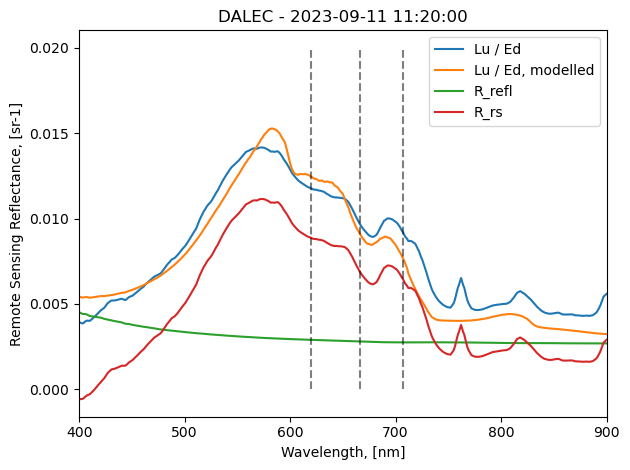

In [163]:
# plot results
plt.figure()
plt.title('DALEC - ' + str(log1.Date.unique()[0]))
plt.plot(wl, Lu/Ed, label='Lu / Ed')
plt.plot(wl, Lu_Ed_modelled, label='Lu / Ed, modelled')
plt.plot(wl, Rrs_refl, label='R_refl')
plt.plot(wl, Rrs_obs, label='R_rs')

plt.plot([620, 620], [0, 0.02], 'k--', alpha=0.5)
plt.plot([666, 666], [0, 0.02], 'k--', alpha=0.5)
plt.plot([707, 707], [0, 0.02], 'k--', alpha=0.5)


plt.xlabel('Wavelength, [nm]')
plt.ylabel('Remote Sensing Reflectance, [sr-1]')
plt.xlim(wl[0], wl[-1])
plt.legend(loc=0)
plt.tight_layout()
plt.show()

In [151]:
a_ph = pd.read_csv(spectra_path + 'phyto.A', skiprows=11, sep='\t', index_col=0).iloc[:,0]

a_w = pd.read_csv(spectra_path + 'water.A', skiprows=10, sep='\t', index_col=0).iloc[:,0]
daw_dT = pd.read_csv(spectra_path + 'daWdT.txt', skiprows=10, sep='\t', index_col=0).iloc[:,0]
astar_y = pd.read_csv(spectra_path + 'Y.A', skiprows=11, delimiter=' ', index_col=0).loc[350:].iloc[:,0]

In [152]:
astar_y

350    3.7026
351    3.6382
352    3.5751
353    3.5133
354    3.4527
        ...  
896    0.0706
897    0.0704
898    0.0702
899    0.0699
900    0.0697
Name: nm, Length: 551, dtype: float64

In [57]:
data = pd.read_csv('rrs_model_3C-master/example_data.csv', index_col=0, skiprows=15)

In [58]:
data

,"Sky Radiance, [mW/(m^2 nm sr)]","Upwelling Radiance, [mW/(m^2 nm sr)]","Downwelling Irradiance, [mW/(m^2 nm)]"
"Wavelength, [nm]",,,
350,45.629755,1.897127,349.400872
351,45.818006,1.908482,355.347031
352,46.006256,1.919836,361.293191
353,46.194507,1.931190,367.239350
354,46.228695,1.938669,371.897578
...,...,...,...
896,2.853874,0.205237,478.122504
897,2.782253,0.198696,465.078760
898,2.703748,0.191313,451.677966


In [31]:
def uniform_grid_spectra(DALEC_sample, spect_wavelengths, param='Lu', nsteps=200, min_waveL=400, max_waveL=1000):
    """
    - takes spectrum from a single sample of a DALEC log file and converts to a uniform grid
    - grid is defined by nsteps, min_waveL and max_waveL
    - param gives which variable to grid: can choose between 'Lu', 'Lsky' and 'Ed' 
    """
    wavelength_grid = np.linspace(min_waveL, max_waveL, num=nsteps)
    
    y = DALEC_sample.loc[param]['Spectral Magnitude'].values
    x = spect_wavelengths[param].values
    interp = interpolate.interp1d(x, y)
    out = np.column_stack((wavelength_grid,
                         interp(wavelength_grid)))
    
    return out


In [42]:
def uniform_grid_spectra_multi(DALEC_log, spect_wavelengths=None, RHO=0.028, Rrs_method='standard',
                               nsteps=601, min_waveL=400, max_waveL=1000,
                               resample_to_SDs=True, col_end='_median'):
    '''
    takes a DALEC logfile (eg. from load_DALEC_log, or aggregated with resampleMultiLog)
    and performs regridding followed by calculation of Rrs 
    resample_to_SDs options allows for resampling to the superDoves wavebands
    NOTE this will regrid for all unique datetimes in the Datetime column and will be VERY SLOW
    if you have too many dates! hence, good idea to use resampleMultiLog() beforehand
    use col_end to add a suffix to the column names to indicate how they were previously calc'd
    eg. '_mean'
    
    Rrs_method allows selection of either 'standard', which uses the rho parameter
    or '3C', which uses the 3C method from here https://gitlab.com/pgroetsch/rrs_model_3C/
    '''
    
    if spect_wavelengths is None:
        spect_wavelengths = load_DALEC_spect_wavelengths('C:/Users/daa5/Project/DALEC_processing/data/Jul-Aug/DALEC_72_73.dtf')
    
    df_out = None
    if resample_to_SDs:
        RSR_doves_file='non-DALEC-data/RSR-Superdove.csv'
        RSR_doves = pd.read_csv(RSR_doves_file)
        doves_wavelengths = [444., 492., 533., 566., 612., 666., 707., 866.]

    for date in DALEC_log.index.get_level_values('Datetime').unique():
        df = DALEC_log.loc[:, :, [date]]
        Lu = uniform_grid_spectra(df, spect_wavelengths, param='Lu', nsteps=nsteps)
        Lsky = uniform_grid_spectra(df, spect_wavelengths, param='Lsky', nsteps=nsteps)
        Ed = uniform_grid_spectra(df, spect_wavelengths, param='Ed', nsteps=nsteps)
        if Rrs_method == 'standard':
            Rrs = (Lu[:, 1] - (RHO * Lsky[:, 1])) / Ed[:, 1]
            valid_wl = Lu[:, 0] <= 1000
            data_len = nsteps
        elif Rrs_method == '3C':
            wl = Lu[:, 0]
            valid_wl = wl <= 900
            print(len(wl[valid_wl]))
            sun_zenith = 90 - df['Solar Elev'][0]
            Rrs_3C, Rrs = Rrs_3C_calc(wl[valid_wl], Lu[:, 1][valid_wl], 
                                       Lsky[:, 1][valid_wl], Ed[:, 1][valid_wl],
                                       sun_zenith)
            data_len = len(wl[valid_wl])
        else:
            print('ERROR - unrecognised Rrs_method!')
            print('we only accept "standard", or "3C" as Rrs methods')
        
        if resample_to_SDs:
            DALEC_SD = spectralConv.SD_band_calc(RSR_doves, Rrs,
                                                 RSR_doves['Wavelength (nm)'].values)


            df_tmp = pd.DataFrame(data=DALEC_SD, columns=['Rrs'+col_end])
            df_tmp['Date'] = np.full((8,), date)
            df_tmp['Wavelength'] = doves_wavelengths
            
            if Rrs_method=='3C':
                DALEC_SD_3C = spectralConv.SD_band_calc(RSR_doves, Rrs_3C,
                                                        RSR_doves['Wavelength (nm)'].values)
                df_tmp['Rrs_3C'+col_end] = DALEC_SD_3C
                
            df_tmp.set_index(['Date', 'Wavelength'], inplace=True)
            

        else:
            df_tmp = pd.DataFrame(index=np.full((data_len,), date),
                                  data={'Wavelength': Lu[:, 0][valid_wl],
                                        'Lu'+col_end: Lu[:, 1][valid_wl], 
                                        'Lsky'+col_end: Lsky[:, 1][valid_wl],
                                        'Ed'+col_end: Ed[:, 1][valid_wl],
                                        'Rrs'+col_end: Rrs})
            if Rrs_method == '3C':
                df_tmp['Rrs_3C'+col_end] = Rrs_3C
            df_tmp.index.rename('Date', inplace=True)
            df_tmp.set_index('Wavelength', append=True, inplace=True)
            
        if df_out is None:
            df_out = df_tmp.copy()
        else:
            df_out = pd.concat([df_out, df_tmp])

    return df_out

In [43]:
log_Rrs = uniform_grid_spectra_multi(log_re, spect_wavelengths=spect_wavelengths, resample_to_SDs=False, 
                                     Rrs_method='3C')


501


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35900D-02    |proj g|=  4.30483D-02

At iterate    1    f=  1.06839D-02    |proj g|=  3.80512D-02

At iterate    2    f=  9.64673D-03    |proj g|=  2.94247D-02

At iterate    3    f=  8.31671D-03    |proj g|=  1.39882D-02

At iterate    4    f=  7.77256D-03    |proj g|=  1.51531D-02

At iterate    5    f=  4.35593D-03    |proj g|=  3.64174D-02

At iterate    6    f=  3.14084D-03    |proj g|=  1.46935D-02

At iterate    7    f=  2.52558D-03    |proj g|=  7.60054D-03

At iterate    8    f=  2.29999D-03    |proj g|=  3.51519D-03

At iterate    9    f=  2.22851D-03    |proj g|=  1.37329D-03

At iterate   10    f=  2.21114D-03    |proj g|=  3.69159D-04

At iterate   11    f=  2.20503D-03    |proj g|=  3.34037D-04

At iterate   12    f=  2.19793D-03    |proj g|=  6.82916D-04

At iterate   13    f=  2.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52718D-02    |proj g|=  3.70551D-02

At iterate    1    f=  1.19718D-02    |proj g|=  2.03675D-02

At iterate    2    f=  1.13757D-02    |proj g|=  1.75354D-02

At iterate    3    f=  8.61760D-03    |proj g|=  2.02279D-02

At iterate    4    f=  6.45132D-03    |proj g|=  3.28811D-02

At iterate    5    f=  4.54916D-03    |proj g|=  1.45648D-02

At iterate    6    f=  3.90377D-03    |proj g|=  7.60591D-03

At iterate    7    f=  3.64032D-03    |proj g|=  3.28718D-03

At iterate    8    f=  3.56168D-03    |proj g|=  1.07084D-03

At iterate    9    f=  3.52544D-03    |proj g|=  9.11692D-04

At iterate   10    f=  3.48779D-03    |proj g|=  8.73926D-04

At iterate   11    f=  3.44062D-03    |proj g|=  5.36419D-04

At iterate   12    f=  3.41999D-03    |proj g|=  2.65787D-04

At iterate   13    f=  3.4

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25272D-02    |proj g|=  5.23025D-02

At iterate    1    f=  7.59314D-03    |proj g|=  4.40786D-02

At iterate    2    f=  6.34150D-03    |proj g|=  2.93785D-02

At iterate    3    f=  5.86609D-03    |proj g|=  3.58092D-02

At iterate    4    f=  5.26134D-03    |proj g|=  1.02702D-02

At iterate    5    f=  4.08405D-03    |proj g|=  8.17558D-03

At iterate    6    f=  2.07778D-03    |proj g|=  2.10085D-02

At iterate    7    f=  1.71114D-03    |proj g|=  1.05352D-02

At iterate    8    f=  1.46600D-03    |proj g|=  3.40150D-03

At iterate    9    f=  1.41137D-03    |proj g|=  1.27641D-03

At iterate   10    f=  1.39505D-03    |proj g|=  7.84163D-04

At iterate   11    f=  1.38438D-03    |proj g|=  6.57848D-04

At iterate   12    f=  1.36136D-03    |proj g|=  1.27663D-03

At iterate   13    f=  1.3

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52835D-02    |proj g|=  3.79049D-02

At iterate    1    f=  1.18626D-02    |proj g|=  2.20647D-02

At iterate    2    f=  1.13009D-02    |proj g|=  1.92911D-02

At iterate    3    f=  1.05901D-02    |proj g|=  1.21524D-02

At iterate    4    f=  8.27903D-03    |proj g|=  6.22385D-02

At iterate    5    f=  6.42375D-03    |proj g|=  2.16522D-02

At iterate    6    f=  4.92446D-03    |proj g|=  9.02200D-03

At iterate    7    f=  3.84866D-03    |proj g|=  7.64170D-03

At iterate    8    f=  3.46354D-03    |proj g|=  4.52166D-03

At iterate    9    f=  3.32374D-03    |proj g|=  1.83826D-03

At iterate   10    f=  3.28675D-03    |proj g|=  5.45529D-04

At iterate   11    f=  3.27291D-03    |proj g|=  5.63629D-04

At iterate   12    f=  3.26033D-03    |proj g|=  6.62920D-04

At iterate   13    f=  3.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73973D-02    |proj g|=  4.31011D-02

At iterate    1    f=  1.30034D-02    |proj g|=  2.05326D-02

At iterate    2    f=  1.22494D-02    |proj g|=  1.67144D-02

At iterate    3    f=  1.12359D-02    |proj g|=  1.74425D-02

At iterate    4    f=  6.38943D-03    |proj g|=  3.85958D-02

At iterate    5    f=  5.06634D-03    |proj g|=  1.32090D-02

At iterate    6    f=  4.44068D-03    |proj g|=  6.42288D-03

At iterate    7    f=  4.23351D-03    |proj g|=  3.12167D-03

At iterate    8    f=  4.17774D-03    |proj g|=  1.10216D-03

At iterate    9    f=  4.16065D-03    |proj g|=  6.00269D-04

At iterate   10    f=  4.14877D-03    |proj g|=  6.06017D-04

At iterate   11    f=  4.13320D-03    |proj g|=  8.36878D-04

At iterate   12    f=  4.11801D-03    |proj g|=  2.32022D-04

At iterate   13    f=  4.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07264D-02    |proj g|=  5.92266D-02

At iterate    1    f=  1.45130D-02    |proj g|=  5.37101D-02

At iterate    2    f=  1.36849D-02    |proj g|=  4.76394D-02

At iterate    3    f=  1.13837D-02    |proj g|=  1.75067D-02

At iterate    4    f=  1.07770D-02    |proj g|=  1.93100D-02

At iterate    5    f=  6.83212D-03    |proj g|=  4.53192D-02

At iterate    6    f=  5.33419D-03    |proj g|=  2.33218D-02

At iterate    7    f=  4.37833D-03    |proj g|=  1.08719D-02

At iterate    8    f=  4.02247D-03    |proj g|=  5.24184D-03

At iterate    9    f=  3.89330D-03    |proj g|=  2.23358D-03

At iterate   10    f=  3.85709D-03    |proj g|=  8.01443D-04

At iterate   11    f=  3.84393D-03    |proj g|=  6.75301D-04

At iterate   12    f=  3.83021D-03    |proj g|=  8.76927D-04

At iterate   13    f=  3.8

 This problem is unconstrained.



At iterate   77    f=  7.61077D-04    |proj g|=  2.42452D-04

At iterate   78    f=  7.56875D-04    |proj g|=  3.88118D-04

At iterate   79    f=  7.51913D-04    |proj g|=  5.09135D-04

At iterate   80    f=  7.50365D-04    |proj g|=  4.39339D-04

At iterate   81    f=  7.48679D-04    |proj g|=  1.48761D-04

At iterate   82    f=  7.47177D-04    |proj g|=  6.07853D-05

At iterate   83    f=  7.47095D-04    |proj g|=  1.90505D-04

At iterate   84    f=  7.46714D-04    |proj g|=  1.32267D-04

At iterate   85    f=  7.46554D-04    |proj g|=  4.26285D-05

At iterate   86    f=  7.46531D-04    |proj g|=  2.05663D-05

At iterate   87    f=  7.46520D-04    |proj g|=  1.07414D-05

At iterate   88    f=  7.46519D-04    |proj g|=  7.19981D-07

At iterate   89    f=  7.46519D-04    |proj g|=  6.42881D-07

At iterate   90    f=  7.46519D-04    |proj g|=  2.35597D-08

At iterate   91    f=  7.46519D-04    |proj g|=  1.95503D-08

At iterate   92    f=  7.46519D-04    |proj g|=  2.89482D-09

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46286D-02    |proj g|=  5.82505D-02

At iterate    1    f=  8.21814D-03    |proj g|=  4.93253D-02

At iterate    2    f=  7.07466D-03    |proj g|=  3.66990D-02

At iterate    3    f=  5.99900D-03    |proj g|=  1.02009D-02

At iterate    4    f=  5.72833D-03    |proj g|=  1.34316D-02

At iterate    5    f=  4.98868D-03    |proj g|=  2.23482D-02

At iterate    6    f=  3.79235D-03    |proj g|=  3.17845D-02

At iterate    7    f=  2.72134D-03    |proj g|=  1.92104D-02

At iterate    8    f=  2.19365D-03    |proj g|=  8.12564D-03

At iterate    9    f=  2.00349D-03    |proj g|=  2.87448D-03

At iterate   10    f=  1.94812D-03    |proj g|=  9.87460D-04

At iterate   11    f=  1.93150D-03    |proj g|=  7.50246D-04

At iterate   12    f=  1.91712D-03    |proj g|=  1.34222D-03

At iterate   13    f=  1.8

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38881D-02    |proj g|=  5.69382D-02

At iterate    1    f=  7.76757D-03    |proj g|=  4.80607D-02

At iterate    2    f=  6.60604D-03    |proj g|=  3.48091D-02

At iterate    3    f=  5.63833D-03    |proj g|=  9.71786D-03

At iterate    4    f=  5.40381D-03    |proj g|=  1.24799D-02

At iterate    5    f=  4.69533D-03    |proj g|=  2.14656D-02

At iterate    6    f=  3.62495D-03    |proj g|=  3.01459D-02

At iterate    7    f=  2.62444D-03    |proj g|=  1.84651D-02

At iterate    8    f=  2.12906D-03    |proj g|=  7.80104D-03

At iterate    9    f=  1.94987D-03    |proj g|=  2.66721D-03

At iterate   10    f=  1.89755D-03    |proj g|=  9.57767D-04

At iterate   11    f=  1.88134D-03    |proj g|=  7.23906D-04

At iterate   12    f=  1.86649D-03    |proj g|=  1.45655D-03

At iterate   13    f=  1.8

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30105D-02    |proj g|=  5.69371D-02

At iterate    1    f=  6.78606D-03    |proj g|=  4.72537D-02

At iterate    2    f=  5.54175D-03    |proj g|=  3.12168D-02

At iterate    3    f=  5.05642D-03    |proj g|=  2.84642D-02

At iterate    4    f=  4.65363D-03    |proj g|=  9.13569D-03

At iterate    5    f=  3.96662D-03    |proj g|=  7.82484D-03

At iterate    6    f=  2.14679D-03    |proj g|=  1.71013D-02

At iterate    7    f=  1.86777D-03    |proj g|=  8.97976D-03

At iterate    8    f=  1.68108D-03    |proj g|=  2.49701D-03

At iterate    9    f=  1.64107D-03    |proj g|=  1.10013D-03

At iterate   10    f=  1.62521D-03    |proj g|=  8.64878D-04

At iterate   11    f=  1.60599D-03    |proj g|=  1.27316D-03

At iterate   12    f=  1.56229D-03    |proj g|=  2.62656D-03

At iterate   13    f=  1.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07624D-02    |proj g|=  5.60658D-02

At iterate    1    f=  4.36510D-03    |proj g|=  4.31113D-02

At iterate    2    f=  3.08923D-03    |proj g|=  1.77087D-02

At iterate    3    f=  2.89164D-03    |proj g|=  9.36588D-03

At iterate    4    f=  2.80766D-03    |proj g|=  7.10404D-03

At iterate    5    f=  2.62666D-03    |proj g|=  6.09227D-03

At iterate    6    f=  2.10796D-03    |proj g|=  1.38568D-02

At iterate    7    f=  1.34660D-03    |proj g|=  1.19930D-02

At iterate    8    f=  7.87582D-04    |proj g|=  5.38172D-03

At iterate    9    f=  7.47960D-04    |proj g|=  5.94181D-03

At iterate   10    f=  6.20308D-04    |proj g|=  3.17015D-03

At iterate   11    f=  5.35656D-04    |proj g|=  1.13418D-03

At iterate   12    f=  4.92456D-04    |proj g|=  1.03221D-03

At iterate   13    f=  4.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.96096D-03    |proj g|=  4.97540D-02

At iterate    1    f=  4.14324D-03    |proj g|=  3.90766D-02

At iterate    2    f=  2.92300D-03    |proj g|=  1.58149D-02

At iterate    3    f=  2.74012D-03    |proj g|=  9.09072D-03

At iterate    4    f=  2.65051D-03    |proj g|=  6.79415D-03

At iterate    5    f=  2.47803D-03    |proj g|=  5.11989D-03

At iterate    6    f=  1.96271D-03    |proj g|=  1.28401D-02

At iterate    7    f=  1.27899D-03    |proj g|=  1.09698D-02

At iterate    8    f=  8.97920D-04    |proj g|=  2.55708D-03

At iterate    9    f=  8.74494D-04    |proj g|=  3.80274D-03

At iterate   10    f=  8.21654D-04    |proj g|=  4.69949D-03

At iterate   11    f=  7.04969D-04    |proj g|=  5.07322D-03

At iterate   12    f=  5.42175D-04    |proj g|=  1.81613D-03

At iterate   13    f=  4.9

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.74571D-03    |proj g|=  4.63184D-02

At iterate    1    f=  2.79845D-03    |proj g|=  2.68076D-02

At iterate    2    f=  2.36458D-03    |proj g|=  5.26367D-03

At iterate    3    f=  1.62911D-03    |proj g|=  4.60751D-03

At iterate    4    f=  8.94702D-04    |proj g|=  8.87215D-03

At iterate    5    f=  7.37196D-04    |proj g|=  6.06411D-03

At iterate    6    f=  6.18063D-04    |proj g|=  1.52453D-03

At iterate    7    f=  5.84801D-04    |proj g|=  9.74702D-04

At iterate    8    f=  5.63110D-04    |proj g|=  1.62561D-03

At iterate    9    f=  5.19124D-04    |proj g|=  2.47279D-03

At iterate   10    f=  4.26632D-04    |proj g|=  1.68421D-03

At iterate   11    f=  4.09979D-04    |proj g|=  7.73975D-04

At iterate   12    f=  4.05207D-04    |proj g|=  4.49759D-04

At iterate   13    f=  4.0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90657D-03    |proj g|=  4.25501D-02

At iterate    1    f=  2.69571D-03    |proj g|=  2.21799D-02

At iterate    2    f=  2.35758D-03    |proj g|=  5.08228D-03

At iterate    3    f=  1.56316D-03    |proj g|=  4.24042D-03

At iterate    4    f=  8.55981D-04    |proj g|=  8.74075D-03

At iterate    5    f=  7.17591D-04    |proj g|=  5.44820D-03

At iterate    6    f=  6.29153D-04    |proj g|=  1.05674D-03

At iterate    7    f=  6.12608D-04    |proj g|=  6.54791D-04

At iterate    8    f=  6.03826D-04    |proj g|=  1.04365D-03

At iterate    9    f=  5.83439D-04    |proj g|=  1.76186D-03

At iterate   10    f=  5.26835D-04    |proj g|=  2.28336D-03

At iterate   11    f=  4.52785D-04    |proj g|=  2.81383D-04

At iterate   12    f=  4.46446D-04    |proj g|=  5.65850D-04

At iterate   13    f=  4.4

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94673D-03    |proj g|=  4.63964D-02

At iterate    1    f=  3.89032D-03    |proj g|=  3.72248D-02

At iterate    2    f=  2.68894D-03    |proj g|=  1.54922D-02

At iterate    3    f=  2.50974D-03    |proj g|=  9.62699D-03

At iterate    4    f=  2.41258D-03    |proj g|=  6.46903D-03

At iterate    5    f=  2.27841D-03    |proj g|=  4.70989D-03

At iterate    6    f=  1.76055D-03    |proj g|=  1.20470D-02

At iterate    7    f=  1.09184D-03    |proj g|=  1.03753D-02

At iterate    8    f=  7.51436D-04    |proj g|=  3.54559D-03

At iterate    9    f=  7.39088D-04    |proj g|=  2.98059D-03

At iterate   10    f=  7.01100D-04    |proj g|=  6.88289D-04

At iterate   11    f=  6.85835D-04    |proj g|=  5.91963D-04

At iterate   12    f=  6.50823D-04    |proj g|=  1.62096D-03

At iterate   13    f=  5.7

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09081D-03    |proj g|=  4.71096D-02

At iterate    1    f=  5.06902D-03    |proj g|=  3.94446D-02

At iterate    2    f=  3.83356D-03    |proj g|=  2.22155D-02

At iterate    3    f=  3.54313D-03    |proj g|=  2.07640D-02

At iterate    4    f=  3.28308D-03    |proj g|=  7.44179D-03

At iterate    5    f=  2.75392D-03    |proj g|=  5.77045D-03

At iterate    6    f=  1.30200D-03    |proj g|=  4.06932D-03

At iterate    7    f=  1.09766D-03    |proj g|=  7.26343D-03

At iterate    8    f=  1.00118D-03    |proj g|=  4.64593D-03

At iterate    9    f=  9.54694D-04    |proj g|=  1.20268D-03

At iterate   10    f=  9.45328D-04    |proj g|=  6.17306D-04

At iterate   11    f=  9.41631D-04    |proj g|=  7.54238D-04

At iterate   12    f=  9.34076D-04    |proj g|=  1.25855D-03

At iterate   13    f=  9.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47219D-02    |proj g|=  6.06342D-02

At iterate    1    f=  7.59935D-03    |proj g|=  5.20305D-02

At iterate    2    f=  6.60198D-03    |proj g|=  4.17031D-02

At iterate    3    f=  5.36886D-03    |proj g|=  8.53689D-03

At iterate    4    f=  5.14228D-03    |proj g|=  1.26845D-02

At iterate    5    f=  4.79111D-03    |proj g|=  1.42458D-02

At iterate    6    f=  3.52636D-03    |proj g|=  2.97732D-02

At iterate    7    f=  2.73499D-03    |proj g|=  2.28470D-02

At iterate    8    f=  2.10782D-03    |proj g|=  9.35071D-03

At iterate    9    f=  1.89840D-03    |proj g|=  3.47482D-03

At iterate   10    f=  1.82998D-03    |proj g|=  1.11752D-03

At iterate   11    f=  1.80997D-03    |proj g|=  8.37576D-04

At iterate   12    f=  1.79492D-03    |proj g|=  1.16028D-03

At iterate   13    f=  1.7

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


501
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76902D-02    |proj g|=  6.78743D-02

At iterate    1    f=  8.44181D-03    |proj g|=  5.82044D-02


 This problem is unconstrained.



At iterate    2    f=  7.45774D-03    |proj g|=  4.78898D-02

At iterate    3    f=  6.00823D-03    |proj g|=  9.52121D-03

At iterate    4    f=  5.76842D-03    |proj g|=  1.40245D-02

At iterate    5    f=  5.35652D-03    |proj g|=  1.60393D-02

At iterate    6    f=  4.03540D-03    |proj g|=  3.18031D-02

At iterate    7    f=  3.15352D-03    |proj g|=  2.53830D-02

At iterate    8    f=  2.45585D-03    |proj g|=  1.10120D-02

At iterate    9    f=  2.20893D-03    |proj g|=  3.84524D-03

At iterate   10    f=  2.12803D-03    |proj g|=  1.25021D-03

At iterate   11    f=  2.10370D-03    |proj g|=  9.07608D-04

At iterate   12    f=  2.08504D-03    |proj g|=  1.63602D-03

At iterate   13    f=  2.04699D-03    |proj g|=  3.01834D-03

At iterate   14    f=  1.97806D-03    |proj g|=  5.01607D-03

At iterate   15    f=  1.88360D-03    |proj g|=  6.98275D-03

At iterate   16    f=  1.76206D-03    |proj g|=  7.24194D-03

At iterate   17    f=  1.55614D-03    |proj g|=  2.52285D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84603D-02    |proj g|=  7.03668D-02

At iterate    1    f=  8.40402D-03    |proj g|=  6.03104D-02

At iterate    2    f=  7.42326D-03    |proj g|=  4.99323D-02

At iterate    3    f=  5.91278D-03    |proj g|=  9.81790D-03

At iterate    4    f=  5.67451D-03    |proj g|=  1.43168D-02

At iterate    5    f=  5.24800D-03    |proj g|=  1.64976D-02

At iterate    6    f=  3.93598D-03    |proj g|=  3.21346D-02

At iterate    7    f=  3.03725D-03    |proj g|=  2.61023D-02

At iterate    8    f=  2.32651D-03    |proj g|=  1.15830D-02

At iterate    9    f=  2.07013D-03    |proj g|=  3.98954D-03

At iterate   10    f=  1.98710D-03    |proj g|=  1.24801D-03

At iterate   11    f=  1.96273D-03    |proj g|=  8.81030D-04

At iterate   12    f=  1.94477D-03    |proj g|=  1.71246D-03

At iterate   13    f=  1.9


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    3    f=  6.26571D-03    |proj g|=  1.02835D-02

At iterate    4    f=  6.01108D-03    |proj g|=  1.45596D-02

At iterate    5    f=  5.61613D-03    |proj g|=  1.63641D-02

At iterate    6    f=  4.16997D-03    |proj g|=  3.22419D-02

At iterate    7    f=  3.28912D-03    |proj g|=  2.51780D-02

At iterate    8    f=  2.59910D-03    |proj g|=  1.06944D-02

At iterate    9    f=  2.36170D-03    |proj g|=  3.74177D-03

At iterate   10    f=  2.28482D-03    |proj g|=  1.25638D-03

At iterate   11    f=  2.26155D-03    |proj g|=  9.26453D-04

At iterate   12    f=  2.24258D-03    |proj g|=  1.62156D-03

At iterate   13    f=  2.20351D-03    |proj g|=  3.05067D-03

At iterate   14    f=  2.13304D-03    |proj g|=  5.15329D-03

At iterate   15    f=  2.03733D-03    |proj g|=  7.15339D-03

At iterate   16    f=  1.90346D-03    |proj g|=  7.33318D-03

At iterate   17    f=  1.73534D-03    |proj g|=  4.26819D-03

At iterate   18    f=  1.67177D-03    |proj g|=  1.04148D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09620D-02    |proj g|=  8.11294D-02

At iterate    1    f=  6.42921D-03    |proj g|=  6.35816D-02

At iterate    2    f=  4.94958D-03    |proj g|=  3.81553D-02

At iterate    3    f=  4.39361D-03    |proj g|=  1.52979D-02

At iterate    4    f=  4.21040D-03    |proj g|=  9.16929D-03

At iterate    5    f=  4.04991D-03    |proj g|=  7.66267D-03

At iterate    6    f=  2.88617D-03    |proj g|=  1.64891D-02

At iterate    7    f=  1.47098D-03    |proj g|=  4.02130D-03

At iterate    8    f=  1.34736D-03    |proj g|=  5.46126D-03

At iterate    9    f=  8.78658D-04    |proj g|=  4.11365D-03

At iterate   10    f=  7.65571D-04    |proj g|=  1.92649D-03

At iterate   11    f=  7.14678D-04    |proj g|=  1.42068D-03

At iterate   12    f=  6.86455D-04    |proj g|=  1.16416D-03

At iterate   13    f=  6.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51283D-01    |proj g|=  4.07229D-01

At iterate    1    f=  3.61109D-02    |proj g|=  1.24295D-01

At iterate    2    f=  1.55949D-02    |proj g|=  6.65106D-02

At iterate    3    f=  1.19182D-02    |proj g|=  1.03204D-01

At iterate    4    f=  5.66474D-03    |proj g|=  1.32872D-02

At iterate    5    f=  5.45716D-03    |proj g|=  1.00832D-02

At iterate    6    f=  5.13402D-03    |proj g|=  7.16669D-03

At iterate    7    f=  4.73760D-03    |proj g|=  1.15297D-02

At iterate    8    f=  4.19161D-03    |proj g|=  1.18093D-02

At iterate    9    f=  3.78749D-03    |proj g|=  9.10643D-03

At iterate   10    f=  3.60120D-03    |proj g|=  8.19279D-03

At iterate   11    f=  3.38531D-03    |proj g|=  4.07888D-03

At iterate   12    f=  3.18546D-03    |proj g|=  1.37860D-02

At iterate   13    f=  3.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03918D+00    |proj g|=  6.24437D-01

At iterate    1    f=  1.23888D-02    |proj g|=  1.51105D-01

At iterate    2    f=  1.11101D-02    |proj g|=  4.09811D-02

At iterate    3    f=  1.00281D-02    |proj g|=  1.74886D-02

At iterate    4    f=  9.36679D-03    |proj g|=  5.79867D-03

At iterate    5    f=  9.26649D-03    |proj g|=  5.57533D-03

At iterate    6    f=  9.08826D-03    |proj g|=  1.49993D-02

At iterate    7    f=  8.99173D-03    |proj g|=  1.41788D-02

At iterate    8    f=  8.56350D-03    |proj g|=  1.19367D-02

At iterate    9    f=  8.21490D-03    |proj g|=  2.55589D-02

At iterate   10    f=  7.83516D-03    |proj g|=  3.64301D-02

At iterate   11    f=  7.60264D-03    |proj g|=  2.42045D-02

At iterate   12    f=  7.55913D-03    |proj g|=  1.51411D-02

At iterate   13    f=  7.5

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60269D-02    |proj g|=  6.87007D-02

At iterate    1    f=  6.07130D-03    |proj g|=  5.56441D-02

At iterate    2    f=  4.74899D-03    |proj g|=  3.59671D-02

At iterate    3    f=  4.22169D-03    |proj g|=  2.02514D-02

At iterate    4    f=  3.97847D-03    |proj g|=  7.89337D-03

At iterate    5    f=  3.56244D-03    |proj g|=  6.07708D-03

At iterate    6    f=  1.75252D-03    |proj g|=  9.42503D-03

At iterate    7    f=  1.45798D-03    |proj g|=  1.08821D-02

At iterate    8    f=  1.08903D-03    |proj g|=  2.67882D-03

At iterate    9    f=  1.01321D-03    |proj g|=  1.23336D-03

At iterate   10    f=  9.24096D-04    |proj g|=  1.23058D-03

At iterate   11    f=  7.61130D-04    |proj g|=  1.19285D-03

At iterate   12    f=  7.19957D-04    |proj g|=  3.21294D-03

At iterate   13    f=  7.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06839D-02    |proj g|=  7.99021D-02

At iterate    1    f=  6.62995D-03    |proj g|=  6.32771D-02

At iterate    2    f=  5.17391D-03    |proj g|=  3.91905D-02

At iterate    3    f=  4.58830D-03    |proj g|=  1.58485D-02

At iterate    4    f=  4.38570D-03    |proj g|=  8.91061D-03

At iterate    5    f=  4.23646D-03    |proj g|=  7.23787D-03

At iterate    6    f=  2.83344D-03    |proj g|=  1.41820D-02

At iterate    7    f=  1.70590D-03    |proj g|=  1.19839D-02

At iterate    8    f=  1.53278D-03    |proj g|=  4.10898D-03

At iterate    9    f=  1.38176D-03    |proj g|=  2.65229D-03

At iterate   10    f=  9.44794D-04    |proj g|=  1.38591D-03

At iterate   11    f=  8.36415D-04    |proj g|=  1.27537D-03

At iterate   12    f=  7.50866D-04    |proj g|=  2.47736D-03

At iterate   13    f=  6.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05529D-02    |proj g|=  8.00616D-02

At iterate    1    f=  6.46674D-03    |proj g|=  6.37990D-02

At iterate    2    f=  5.03970D-03    |proj g|=  4.09526D-02

At iterate    3    f=  4.41117D-03    |proj g|=  1.75790D-02

At iterate    4    f=  4.18802D-03    |proj g|=  8.88695D-03

At iterate    5    f=  3.62153D-03    |proj g|=  1.61712D-02

At iterate    6    f=  2.14918D-03    |proj g|=  1.11071D-02

At iterate    7    f=  1.73557D-03    |proj g|=  1.75022D-02

At iterate    8    f=  1.36886D-03    |proj g|=  3.78325D-03

At iterate    9    f=  9.85039D-04    |proj g|=  2.36677D-03

At iterate   10    f=  7.35151D-04    |proj g|=  8.40557D-04

At iterate   11    f=  6.95745D-04    |proj g|=  9.52024D-04

At iterate   12    f=  6.66988D-04    |proj g|=  1.08693D-03

At iterate   13    f=  6.1

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29773D-02    |proj g|=  8.49060D-02

At iterate    1    f=  7.03464D-03    |proj g|=  6.82270D-02

At iterate    2    f=  5.67269D-03    |proj g|=  4.76917D-02

At iterate    3    f=  4.85583D-03    |proj g|=  2.12777D-02

At iterate    4    f=  4.56859D-03    |proj g|=  9.90077D-03

At iterate    5    f=  3.91694D-03    |proj g|=  1.41499D-02

At iterate    6    f=  1.94385D-03    |proj g|=  3.96464D-03

At iterate    7    f=  1.51352D-03    |proj g|=  1.10614D-02

At iterate    8    f=  1.33506D-03    |proj g|=  8.86183D-03

At iterate    9    f=  9.03666D-04    |proj g|=  2.51899D-03

At iterate   10    f=  8.45674D-04    |proj g|=  1.45916D-03

At iterate   11    f=  8.07969D-04    |proj g|=  8.87619D-04

At iterate   12    f=  7.71100D-04    |proj g|=  9.28229D-04

At iterate   13    f=  7.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77850D-02    |proj g|=  7.12216D-02

At iterate    1    f=  7.23362D-03    |proj g|=  6.00537D-02

At iterate    2    f=  6.17829D-03    |proj g|=  4.77449D-02

At iterate    3    f=  5.38241D-03    |proj g|=  3.79358D-02

At iterate    4    f=  4.78383D-03    |proj g|=  8.53948D-03

At iterate    5    f=  4.67066D-03    |proj g|=  9.71545D-03

At iterate    6    f=  3.89802D-03    |proj g|=  1.87701D-02

At iterate    7    f=  3.22453D-03    |proj g|=  2.63534D-02

At iterate    8    f=  2.35893D-03    |proj g|=  2.25997D-02

At iterate    9    f=  1.77622D-03    |proj g|=  1.20854D-02

At iterate   10    f=  1.48190D-03    |proj g|=  4.41676D-03

At iterate   11    f=  1.36645D-03    |proj g|=  1.23397D-03

At iterate   12    f=  1.30828D-03    |proj g|=  1.45803D-03

At iterate   13    f=  1.2

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73611D-02    |proj g|=  7.14998D-02

At iterate    1    f=  6.60514D-03    |proj g|=  5.94165D-02

At iterate    2    f=  5.45569D-03    |proj g|=  4.48395D-02

At iterate    3    f=  4.72267D-03    |proj g|=  3.11754D-02

At iterate    4    f=  4.27646D-03    |proj g|=  8.15440D-03

At iterate    5    f=  3.87649D-03    |proj g|=  1.14690D-02

At iterate    6    f=  3.02700D-03    |proj g|=  2.07940D-02

At iterate    7    f=  2.25686D-03    |proj g|=  2.24595D-02

At iterate    8    f=  1.56792D-03    |proj g|=  9.48759D-03

At iterate    9    f=  1.32934D-03    |proj g|=  4.22382D-03

At iterate   10    f=  1.23773D-03    |proj g|=  1.95630D-03

At iterate   11    f=  1.17611D-03    |proj g|=  1.27142D-03

At iterate   12    f=  1.05295D-03    |proj g|=  1.22250D-03

At iterate   13    f=  8.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.25932D-02    |proj g|=  8.41684D-02

At iterate    1    f=  6.79290D-03    |proj g|=  6.65988D-02

At iterate    2    f=  5.28240D-03    |proj g|=  4.11813D-02

At iterate    3    f=  4.66414D-03    |proj g|=  1.58818D-02

At iterate    4    f=  4.45747D-03    |proj g|=  9.12225D-03

At iterate    5    f=  4.27840D-03    |proj g|=  8.41320D-03

At iterate    6    f=  2.89926D-03    |proj g|=  1.53346D-02

At iterate    7    f=  1.94335D-03    |proj g|=  1.57138D-02

At iterate    8    f=  1.64209D-03    |proj g|=  3.43490D-03

At iterate    9    f=  1.53074D-03    |proj g|=  3.31717D-03

At iterate   10    f=  1.01675D-03    |proj g|=  4.77413D-03

At iterate   11    f=  7.57107D-04    |proj g|=  2.26046D-03

At iterate   12    f=  7.34671D-04    |proj g|=  1.97938D-03

At iterate   13    f=  6.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26924D-02    |proj g|=  8.43730D-02

At iterate    1    f=  6.83955D-03    |proj g|=  6.71348D-02

At iterate    2    f=  5.36506D-03    |proj g|=  4.31298D-02

At iterate    3    f=  4.69341D-03    |proj g|=  1.69298D-02

At iterate    4    f=  4.46579D-03    |proj g|=  9.21532D-03

At iterate    5    f=  4.30052D-03    |proj g|=  7.99634D-03

At iterate    6    f=  2.70989D-03    |proj g|=  1.28234D-02

At iterate    7    f=  1.99033D-03    |proj g|=  1.84673D-02

At iterate    8    f=  1.64519D-03    |proj g|=  3.90827D-03

At iterate    9    f=  1.53622D-03    |proj g|=  3.74498D-03

At iterate   10    f=  8.90306D-04    |proj g|=  2.72028D-03

At iterate   11    f=  7.67242D-04    |proj g|=  2.72077D-03

At iterate   12    f=  7.29164D-04    |proj g|=  1.78095D-03

At iterate   13    f=  6.6

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34530D-02    |proj g|=  8.53175D-02

At iterate    1    f=  7.22882D-03    |proj g|=  6.80210D-02

At iterate    2    f=  5.77570D-03    |proj g|=  4.47622D-02

At iterate    3    f=  5.05477D-03    |proj g|=  1.77705D-02

At iterate    4    f=  4.81079D-03    |proj g|=  9.51758D-03

At iterate    5    f=  4.63837D-03    |proj g|=  8.14635D-03

At iterate    6    f=  2.88731D-03    |proj g|=  1.19742D-02

At iterate    7    f=  2.29577D-03    |proj g|=  2.14888D-02

At iterate    8    f=  1.84553D-03    |proj g|=  4.26316D-03

At iterate    9    f=  1.72708D-03    |proj g|=  4.54652D-03

At iterate   10    f=  1.00196D-03    |proj g|=  3.25898D-03

At iterate   11    f=  8.62952D-04    |proj g|=  3.13052D-03

At iterate   12    f=  8.20357D-04    |proj g|=  1.67788D-03

At iterate   13    f=  7.4

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39266D-02    |proj g|=  8.68201D-02

At iterate    1    f=  7.09219D-03    |proj g|=  6.94064D-02

At iterate    2    f=  5.65940D-03    |proj g|=  4.68716D-02

At iterate    3    f=  4.88370D-03    |proj g|=  1.89049D-02

At iterate    4    f=  4.62262D-03    |proj g|=  9.71166D-03

At iterate    5    f=  3.91472D-03    |proj g|=  1.88562D-02

At iterate    6    f=  2.24801D-03    |proj g|=  9.95985D-03

At iterate    7    f=  1.94137D-03    |proj g|=  1.65330D-02

At iterate    8    f=  1.58243D-03    |proj g|=  4.08011D-03

At iterate    9    f=  1.46953D-03    |proj g|=  3.54665D-03

At iterate   10    f=  9.33098D-04    |proj g|=  7.84485D-04

At iterate   11    f=  8.52678D-04    |proj g|=  1.11807D-03

At iterate   12    f=  7.96695D-04    |proj g|=  1.32767D-03

At iterate   13    f=  7.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.48385D-02    |proj g|=  8.85611D-02

At iterate    1    f=  7.25697D-03    |proj g|=  7.07724D-02

At iterate    2    f=  5.82092D-03    |proj g|=  4.81795D-02

At iterate    3    f=  5.00939D-03    |proj g|=  1.89261D-02

At iterate    4    f=  4.74138D-03    |proj g|=  1.00205D-02

At iterate    5    f=  4.55733D-03    |proj g|=  8.61385D-03

At iterate    6    f=  2.65969D-03    |proj g|=  1.08661D-02

At iterate    7    f=  2.02978D-03    |proj g|=  2.12196D-02

At iterate    8    f=  1.67596D-03    |proj g|=  6.43659D-03

At iterate    9    f=  1.55146D-03    |proj g|=  5.08438D-03

At iterate   10    f=  9.24515D-04    |proj g|=  7.25527D-04

At iterate   11    f=  8.15072D-04    |proj g|=  9.97000D-04

At iterate   12    f=  7.62695D-04    |proj g|=  2.53672D-03

At iterate   13    f=  7.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46882D-02    |proj g|=  8.84261D-02

At iterate    1    f=  7.16292D-03    |proj g|=  7.07036D-02

At iterate    2    f=  5.72753D-03    |proj g|=  4.81512D-02

At iterate    3    f=  4.91831D-03    |proj g|=  1.90172D-02

At iterate    4    f=  4.65010D-03    |proj g|=  9.94383D-03

At iterate    5    f=  4.46961D-03    |proj g|=  8.52894D-03

At iterate    6    f=  2.56541D-03    |proj g|=  1.02974D-02

At iterate    7    f=  1.93438D-03    |proj g|=  2.09043D-02

At iterate    8    f=  1.61069D-03    |proj g|=  7.11667D-03

At iterate    9    f=  1.48196D-03    |proj g|=  5.15632D-03

At iterate   10    f=  8.95160D-04    |proj g|=  8.89216D-04

At iterate   11    f=  7.92671D-04    |proj g|=  1.05180D-03

At iterate   12    f=  7.39641D-04    |proj g|=  4.33928D-03

At iterate   13    f=  7.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62415D-02    |proj g|=  9.07307D-02

At iterate    1    f=  7.72677D-03    |proj g|=  7.25311D-02

At iterate    2    f=  6.31089D-03    |proj g|=  5.04892D-02

At iterate    3    f=  5.42753D-03    |proj g|=  1.97556D-02

At iterate    4    f=  5.14172D-03    |proj g|=  1.05828D-02

At iterate    5    f=  4.93887D-03    |proj g|=  9.12215D-03

At iterate    6    f=  2.92323D-03    |proj g|=  1.13520D-02

At iterate    7    f=  2.28386D-03    |proj g|=  2.28190D-02

At iterate    8    f=  1.87274D-03    |proj g|=  6.62721D-03

At iterate    9    f=  1.73949D-03    |proj g|=  5.48076D-03

At iterate   10    f=  1.02964D-03    |proj g|=  7.46851D-04

At iterate   11    f=  9.07764D-04    |proj g|=  1.09880D-03

At iterate   12    f=  8.54541D-04    |proj g|=  1.82560D-03

At iterate   13    f=  8.1

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34093D-02    |proj g|=  8.60864D-02

At iterate    1    f=  7.05792D-03    |proj g|=  7.06528D-02

At iterate    2    f=  5.87415D-03    |proj g|=  5.46898D-02

At iterate    3    f=  4.84671D-03    |proj g|=  2.88712D-02

At iterate    4    f=  4.43057D-03    |proj g|=  9.86257D-03

At iterate    5    f=  3.80567D-03    |proj g|=  9.60698D-03

At iterate    6    f=  1.90928D-03    |proj g|=  2.11040D-02

At iterate    7    f=  1.53897D-03    |proj g|=  1.31262D-02

At iterate    8    f=  1.04075D-03    |proj g|=  3.67117D-03

At iterate    9    f=  8.90102D-04    |proj g|=  1.61949D-03

At iterate   10    f=  8.23917D-04    |proj g|=  6.02678D-04

At iterate   11    f=  7.91981D-04    |proj g|=  6.20087D-04

At iterate   12    f=  7.63508D-04    |proj g|=  1.08236D-03

At iterate   13    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54432D-02    |proj g|=  9.01044D-02

At iterate    1    f=  7.17649D-03    |proj g|=  7.19382D-02

At iterate    2    f=  5.72910D-03    |proj g|=  4.90396D-02

At iterate    3    f=  4.89942D-03    |proj g|=  1.89457D-02

At iterate    4    f=  4.63031D-03    |proj g|=  1.01709D-02

At iterate    5    f=  4.43693D-03    |proj g|=  8.98128D-03

At iterate    6    f=  2.59017D-03    |proj g|=  1.17966D-02

At iterate    7    f=  1.92880D-03    |proj g|=  2.04721D-02

At iterate    8    f=  1.59096D-03    |proj g|=  5.63447D-03

At iterate    9    f=  1.47431D-03    |proj g|=  4.70732D-03

At iterate   10    f=  8.77786D-04    |proj g|=  9.97257D-04

At iterate   11    f=  7.71233D-04    |proj g|=  9.06580D-04

At iterate   12    f=  7.24961D-04    |proj g|=  1.56075D-03

At iterate   13    f=  6.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50579D-02    |proj g|=  8.90807D-02

At iterate    1    f=  7.25811D-03    |proj g|=  7.13487D-02

At iterate    2    f=  5.83999D-03    |proj g|=  4.93184D-02

At iterate    3    f=  4.99584D-03    |proj g|=  1.96704D-02

At iterate    4    f=  4.71600D-03    |proj g|=  1.00773D-02

At iterate    5    f=  3.95322D-03    |proj g|=  1.94269D-02

At iterate    6    f=  2.19330D-03    |proj g|=  8.89998D-03

At iterate    7    f=  1.86231D-03    |proj g|=  1.50548D-02

At iterate    8    f=  1.56921D-03    |proj g|=  4.33479D-03

At iterate    9    f=  1.43512D-03    |proj g|=  3.32668D-03

At iterate   10    f=  9.73328D-04    |proj g|=  1.05536D-03

At iterate   11    f=  8.84449D-04    |proj g|=  1.14647D-03

At iterate   12    f=  8.04751D-04    |proj g|=  2.25334D-03

At iterate   13    f=  7.5

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40477D-02    |proj g|=  8.70322D-02

At iterate    1    f=  7.14751D-03    |proj g|=  7.00086D-02

At iterate    2    f=  5.76158D-03    |proj g|=  4.89330D-02

At iterate    3    f=  4.92305D-03    |proj g|=  2.07616D-02

At iterate    4    f=  4.63321D-03    |proj g|=  9.75691D-03

At iterate    5    f=  3.92324D-03    |proj g|=  1.61627D-02

At iterate    6    f=  2.00431D-03    |proj g|=  3.99336D-03

At iterate    7    f=  1.67785D-03    |proj g|=  1.13827D-02

At iterate    8    f=  1.48506D-03    |proj g|=  7.68452D-03

At iterate    9    f=  1.00190D-03    |proj g|=  1.39610D-03

At iterate   10    f=  9.06179D-04    |proj g|=  1.02371D-03

At iterate   11    f=  8.35414D-04    |proj g|=  1.45239D-03

At iterate   12    f=  7.84072D-04    |proj g|=  2.91870D-03

At iterate   13    f=  7.3

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38456D-02    |proj g|=  8.68302D-02

At iterate    1    f=  7.06607D-03    |proj g|=  7.00947D-02

At iterate    2    f=  5.70908D-03    |proj g|=  4.98646D-02

At iterate    3    f=  4.83458D-03    |proj g|=  2.17541D-02

At iterate    4    f=  4.52730D-03    |proj g|=  9.92804D-03

At iterate    5    f=  3.80609D-03    |proj g|=  1.50741D-02

At iterate    6    f=  1.78164D-03    |proj g|=  4.78190D-03

At iterate    7    f=  1.48286D-03    |proj g|=  1.01589D-02

At iterate    8    f=  1.21772D-03    |proj g|=  8.66517D-03

At iterate    9    f=  7.80335D-04    |proj g|=  3.48130D-03

At iterate   10    f=  7.14778D-04    |proj g|=  2.13482D-03

At iterate   11    f=  6.78517D-04    |proj g|=  9.66534D-04

At iterate   12    f=  6.44990D-04    |proj g|=  8.17061D-04

At iterate   13    f=  6.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18410D-02    |proj g|=  8.12856D-02

At iterate    1    f=  7.62517D-03    |proj g|=  6.86112D-02

At iterate    2    f=  6.62918D-03    |proj g|=  5.69451D-02

At iterate    3    f=  5.53950D-03    |proj g|=  3.98843D-02

At iterate    4    f=  4.89914D-03    |proj g|=  9.69054D-03

At iterate    5    f=  4.76621D-03    |proj g|=  1.09045D-02

At iterate    6    f=  3.70474D-03    |proj g|=  2.16013D-02

At iterate    7    f=  2.95590D-03    |proj g|=  2.79437D-02

At iterate    8    f=  2.03836D-03    |proj g|=  2.06294D-02

At iterate    9    f=  1.50775D-03    |proj g|=  1.06088D-02

At iterate   10    f=  1.28267D-03    |proj g|=  4.16313D-03

At iterate   11    f=  1.20566D-03    |proj g|=  1.32537D-03

At iterate   12    f=  1.16911D-03    |proj g|=  1.28672D-03

At iterate   13    f=  1.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69347D-02    |proj g|=  9.16105D-02

At iterate    1    f=  8.12962D-03    |proj g|=  7.40299D-02

At iterate    2    f=  6.83222D-03    |proj g|=  5.51611D-02

At iterate    3    f=  5.78504D-03    |proj g|=  2.36992D-02

At iterate    4    f=  5.43505D-03    |proj g|=  1.11987D-02

At iterate    5    f=  4.60165D-03    |proj g|=  1.62746D-02

At iterate    6    f=  2.33668D-03    |proj g|=  5.24512D-03

At iterate    7    f=  1.98312D-03    |proj g|=  1.15652D-02

At iterate    8    f=  1.70411D-03    |proj g|=  9.79733D-03

At iterate    9    f=  1.16602D-03    |proj g|=  3.28853D-03

At iterate   10    f=  1.08081D-03    |proj g|=  1.80265D-03

At iterate   11    f=  1.02928D-03    |proj g|=  1.01184D-03

At iterate   12    f=  9.76307D-04    |proj g|=  9.45289D-04

At iterate   13    f=  9.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38517D-02    |proj g|=  8.50726D-02

At iterate    1    f=  8.16050D-03    |proj g|=  7.18443D-02

At iterate    2    f=  7.16166D-03    |proj g|=  6.00834D-02

At iterate    3    f=  5.94175D-03    |proj g|=  4.00334D-02

At iterate    4    f=  5.29688D-03    |proj g|=  1.08113D-02

At iterate    5    f=  4.69879D-03    |proj g|=  1.59314D-02

At iterate    6    f=  3.62133D-03    |proj g|=  2.49571D-02

At iterate    7    f=  2.55811D-03    |proj g|=  2.59651D-02

At iterate    8    f=  1.75261D-03    |proj g|=  1.10140D-02

At iterate    9    f=  1.47326D-03    |proj g|=  4.62740D-03

At iterate   10    f=  1.38081D-03    |proj g|=  1.84429D-03

At iterate   11    f=  1.34105D-03    |proj g|=  1.16479D-03

At iterate   12    f=  1.28876D-03    |proj g|=  1.27777D-03

At iterate   13    f=  1.1

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78016D-02    |proj g|=  9.35918D-02

At iterate    1    f=  8.11992D-03    |proj g|=  7.55749D-02

At iterate    2    f=  6.83170D-03    |proj g|=  5.68556D-02

At iterate    3    f=  5.73108D-03    |proj g|=  2.39876D-02

At iterate    4    f=  5.37355D-03    |proj g|=  1.16863D-02

At iterate    5    f=  4.50893D-03    |proj g|=  1.72427D-02

At iterate    6    f=  2.26820D-03    |proj g|=  4.81947D-03

At iterate    7    f=  1.84784D-03    |proj g|=  1.16959D-02

At iterate    8    f=  1.62934D-03    |proj g|=  9.47448D-03

At iterate    9    f=  1.11247D-03    |proj g|=  3.12376D-03

At iterate   10    f=  1.03935D-03    |proj g|=  1.87718D-03

At iterate   11    f=  9.92284D-04    |proj g|=  9.87687D-04

At iterate   12    f=  9.49599D-04    |proj g|=  1.01325D-03

At iterate   13    f=  9.1

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94932D-02    |proj g|=  9.66877D-02

At iterate    1    f=  8.32851D-03    |proj g|=  7.73513D-02

At iterate    2    f=  6.97381D-03    |proj g|=  5.67979D-02

At iterate    3    f=  5.88632D-03    |proj g|=  2.27218D-02

At iterate    4    f=  5.55685D-03    |proj g|=  1.23280D-02

At iterate    5    f=  5.31630D-03    |proj g|=  1.01502D-02

At iterate    6    f=  3.10614D-03    |proj g|=  1.31581D-02

At iterate    7    f=  2.05786D-03    |proj g|=  1.85439D-02

At iterate    8    f=  1.82965D-03    |proj g|=  8.76998D-03

At iterate    9    f=  1.61792D-03    |proj g|=  3.71154D-03

At iterate   10    f=  1.20313D-03    |proj g|=  3.05725D-03

At iterate   11    f=  1.04369D-03    |proj g|=  2.09495D-03

At iterate   12    f=  9.38333D-04    |proj g|=  3.39068D-03

At iterate   13    f=  8.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12132D-02    |proj g|=  9.87295D-02

At iterate    1    f=  9.05934D-03    |proj g|=  7.85497D-02

At iterate    2    f=  7.66932D-03    |proj g|=  5.69833D-02

At iterate    3    f=  6.57390D-03    |proj g|=  2.27932D-02

At iterate    4    f=  6.25219D-03    |proj g|=  1.30536D-02

At iterate    5    f=  5.96059D-03    |proj g|=  1.13189D-02

At iterate    6    f=  3.88001D-03    |proj g|=  1.75824D-02

At iterate    7    f=  2.50305D-03    |proj g|=  1.74245D-02

At iterate    8    f=  2.23225D-03    |proj g|=  5.83968D-03

At iterate    9    f=  2.04798D-03    |proj g|=  4.08695D-03

At iterate   10    f=  1.39851D-03    |proj g|=  1.33659D-03

At iterate   11    f=  1.25021D-03    |proj g|=  1.42283D-03

At iterate   12    f=  1.13944D-03    |proj g|=  5.56858D-03

At iterate   13    f=  1.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02564D-02    |proj g|=  9.76205D-02

At iterate    1    f=  8.67239D-03    |proj g|=  7.80179D-02

At iterate    2    f=  7.31695D-03    |proj g|=  5.74341D-02

At iterate    3    f=  6.20276D-03    |proj g|=  2.32021D-02

At iterate    4    f=  5.87005D-03    |proj g|=  1.28260D-02

At iterate    5    f=  5.61437D-03    |proj g|=  1.04577D-02

At iterate    6    f=  3.41581D-03    |proj g|=  1.49644D-02

At iterate    7    f=  2.18054D-03    |proj g|=  1.69233D-02

At iterate    8    f=  1.96809D-03    |proj g|=  8.23479D-03

At iterate    9    f=  1.72181D-03    |proj g|=  3.39830D-03

At iterate   10    f=  1.31951D-03    |proj g|=  3.08539D-03

At iterate   11    f=  1.15766D-03    |proj g|=  1.88029D-03

At iterate   12    f=  1.04586D-03    |proj g|=  2.96062D-03

At iterate   13    f=  9.6

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96335D-02    |proj g|=  9.62659D-02

At iterate    1    f=  8.77092D-03    |proj g|=  7.76719D-02

At iterate    2    f=  7.48664D-03    |proj g|=  5.90453D-02

At iterate    3    f=  6.29995D-03    |proj g|=  2.46144D-02

At iterate    4    f=  5.92992D-03    |proj g|=  1.28857D-02

At iterate    5    f=  4.97036D-03    |proj g|=  2.03985D-02

At iterate    6    f=  2.72253D-03    |proj g|=  8.62481D-03

At iterate    7    f=  2.01541D-03    |proj g|=  1.33016D-02

At iterate    8    f=  1.83774D-03    |proj g|=  8.36822D-03

At iterate    9    f=  1.42425D-03    |proj g|=  1.40847D-03

At iterate   10    f=  1.24997D-03    |proj g|=  1.30632D-03

At iterate   11    f=  1.16523D-03    |proj g|=  1.37469D-03

At iterate   12    f=  1.07950D-03    |proj g|=  5.30810D-03

At iterate   13    f=  1.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72117D-02    |proj g|=  9.16717D-02

At iterate    1    f=  8.62166D-03    |proj g|=  7.56698D-02

At iterate    2    f=  7.47740D-03    |proj g|=  6.06898D-02

At iterate    3    f=  6.20283D-03    |proj g|=  3.14732D-02

At iterate    4    f=  5.72396D-03    |proj g|=  1.25027D-02

At iterate    5    f=  4.89340D-03    |proj g|=  1.05077D-02

At iterate    6    f=  2.27371D-03    |proj g|=  1.72186D-02

At iterate    7    f=  1.84591D-03    |proj g|=  1.47176D-02

At iterate    8    f=  1.35138D-03    |proj g|=  5.51239D-03

At iterate    9    f=  1.20038D-03    |proj g|=  1.77612D-03

At iterate   10    f=  1.14793D-03    |proj g|=  1.09086D-03

At iterate   11    f=  1.09950D-03    |proj g|=  9.40230D-04

At iterate   12    f=  9.87492D-04    |proj g|=  1.08349D-03

At iterate   13    f=  9.6

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80591D-02    |proj g|=  8.86666D-02

At iterate    1    f=  1.11085D-02    |proj g|=  7.61149D-02

At iterate    2    f=  1.01376D-02    |proj g|=  6.53261D-02

At iterate    3    f=  8.63770D-03    |proj g|=  4.58840D-02

At iterate    4    f=  7.84095D-03    |proj g|=  1.39656D-02

At iterate    5    f=  6.90912D-03    |proj g|=  1.80243D-02

At iterate    6    f=  4.87182D-03    |proj g|=  3.16410D-02

At iterate    7    f=  3.91308D-03    |proj g|=  2.67154D-02

At iterate    8    f=  3.16114D-03    |proj g|=  1.27407D-02

At iterate    9    f=  2.86390D-03    |proj g|=  4.04421D-03

At iterate   10    f=  2.75860D-03    |proj g|=  1.40030D-03

At iterate   11    f=  2.71329D-03    |proj g|=  1.64131D-03

At iterate   12    f=  2.66114D-03    |proj g|=  2.87875D-03

At iterate   13    f=  2.5

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74260D-02    |proj g|=  1.06967D-01

At iterate    1    f=  1.11081D-02    |proj g|=  8.33046D-02

At iterate    2    f=  9.59766D-03    |proj g|=  5.80060D-02

At iterate    3    f=  8.47487D-03    |proj g|=  2.38432D-02

At iterate    4    f=  8.16505D-03    |proj g|=  1.60841D-02

At iterate    5    f=  7.57475D-03    |proj g|=  1.62043D-02

At iterate    6    f=  5.42227D-03    |proj g|=  2.35403D-02

At iterate    7    f=  3.25739D-03    |proj g|=  1.70460D-02

At iterate    8    f=  2.97214D-03    |proj g|=  6.07529D-03

At iterate    9    f=  2.71686D-03    |proj g|=  3.95477D-03

At iterate   10    f=  1.95230D-03    |proj g|=  2.13093D-03

At iterate   11    f=  1.75967D-03    |proj g|=  1.96306D-03

At iterate   12    f=  1.56072D-03    |proj g|=  4.79463D-03

At iterate   13    f=  1.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97814D-02    |proj g|=  9.67971D-02

At iterate    1    f=  8.63949D-03    |proj g|=  7.71983D-02

At iterate    2    f=  7.27268D-03    |proj g|=  5.63400D-02

At iterate    3    f=  6.18624D-03    |proj g|=  2.31652D-02

At iterate    4    f=  5.86278D-03    |proj g|=  1.30186D-02

At iterate    5    f=  5.61375D-03    |proj g|=  1.03923D-02

At iterate    6    f=  3.50137D-03    |proj g|=  1.62805D-02

At iterate    7    f=  2.03525D-03    |proj g|=  1.22538D-02

At iterate    8    f=  1.87935D-03    |proj g|=  8.92577D-03

At iterate    9    f=  1.26743D-03    |proj g|=  1.13185D-03

At iterate   10    f=  1.14995D-03    |proj g|=  1.01356D-03

At iterate   11    f=  1.05315D-03    |proj g|=  2.97192D-03

At iterate   12    f=  1.00313D-03    |proj g|=  3.62192D-03

At iterate   13    f=  9.5

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07865D-02    |proj g|=  9.82669D-02

At iterate    1    f=  8.89436D-03    |proj g|=  7.76110D-02

At iterate    2    f=  7.46400D-03    |proj g|=  5.48180D-02

At iterate    3    f=  6.43702D-03    |proj g|=  2.22221D-02

At iterate    4    f=  6.14049D-03    |proj g|=  1.32744D-02

At iterate    5    f=  5.84168D-03    |proj g|=  1.14008D-02

At iterate    6    f=  3.98505D-03    |proj g|=  1.98543D-02

At iterate    7    f=  2.21301D-03    |proj g|=  9.91373D-03

At iterate    8    f=  2.04862D-03    |proj g|=  6.76584D-03

At iterate    9    f=  1.39070D-03    |proj g|=  1.17275D-03

At iterate   10    f=  1.24822D-03    |proj g|=  1.22618D-03

At iterate   11    f=  1.12911D-03    |proj g|=  3.75577D-03

At iterate   12    f=  1.06483D-03    |proj g|=  3.87944D-03

At iterate   13    f=  9.9

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06373D-02    |proj g|=  9.76840D-02

At iterate    1    f=  9.15574D-03    |proj g|=  7.81979D-02

At iterate    2    f=  7.81568D-03    |proj g|=  5.81869D-02

At iterate    3    f=  6.64962D-03    |proj g|=  2.46765D-02

At iterate    4    f=  6.30296D-03    |proj g|=  1.38703D-02

At iterate    5    f=  6.04744D-03    |proj g|=  1.12512D-02

At iterate    6    f=  3.77938D-03    |proj g|=  1.67178D-02

At iterate    7    f=  2.14130D-03    |proj g|=  9.38176D-03

At iterate    8    f=  1.97597D-03    |proj g|=  1.10105D-02

At iterate    9    f=  1.41561D-03    |proj g|=  5.41385D-03

At iterate   10    f=  1.30689D-03    |proj g|=  2.90149D-03

At iterate   11    f=  1.24182D-03    |proj g|=  1.21685D-03

At iterate   12    f=  1.18099D-03    |proj g|=  1.31640D-03

At iterate   13    f=  1.1

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08053D-02    |proj g|=  9.83213D-02

At iterate    1    f=  8.94181D-03    |proj g|=  7.77559D-02

At iterate    2    f=  7.52457D-03    |proj g|=  5.54008D-02

At iterate    3    f=  6.46929D-03    |proj g|=  2.28667D-02

At iterate    4    f=  6.16554D-03    |proj g|=  1.36602D-02

At iterate    5    f=  5.87125D-03    |proj g|=  1.11832D-02

At iterate    6    f=  3.99096D-03    |proj g|=  2.02062D-02

At iterate    7    f=  2.11104D-03    |proj g|=  6.66697D-03

At iterate    8    f=  1.94603D-03    |proj g|=  8.39133D-03

At iterate    9    f=  1.30849D-03    |proj g|=  4.73643D-03

At iterate   10    f=  1.18680D-03    |proj g|=  2.75890D-03

At iterate   11    f=  1.09856D-03    |proj g|=  1.30017D-03

At iterate   12    f=  1.04985D-03    |proj g|=  1.36607D-03

At iterate   13    f=  9.9

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72971D-02    |proj g|=  9.09250D-02

At iterate    1    f=  9.10426D-03    |proj g|=  7.47766D-02

At iterate    2    f=  7.91033D-03    |proj g|=  5.89379D-02

At iterate    3    f=  6.67105D-03    |proj g|=  3.04873D-02

At iterate    4    f=  6.21305D-03    |proj g|=  1.31569D-02

At iterate    5    f=  5.34125D-03    |proj g|=  9.71882D-03

At iterate    6    f=  2.54371D-03    |proj g|=  1.17182D-02

At iterate    7    f=  2.10660D-03    |proj g|=  1.34270D-02

At iterate    8    f=  1.63015D-03    |proj g|=  4.56323D-03

At iterate    9    f=  1.47081D-03    |proj g|=  1.48473D-03

At iterate   10    f=  1.42764D-03    |proj g|=  1.52592D-03

At iterate   11    f=  1.22990D-03    |proj g|=  1.11660D-03

At iterate   12    f=  1.16408D-03    |proj g|=  5.40336D-04

At iterate   13    f=  1.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86307D-02    |proj g|=  5.68723D-02

At iterate    1    f=  1.09027D-02    |proj g|=  2.69925D-02

At iterate    2    f=  1.01814D-02    |proj g|=  1.72692D-02

At iterate    3    f=  9.45362D-03    |proj g|=  1.78848D-02

At iterate    4    f=  5.13940D-03    |proj g|=  3.92744D-02

At iterate    5    f=  4.07375D-03    |proj g|=  1.74465D-02

At iterate    6    f=  3.37794D-03    |proj g|=  7.03809D-03

At iterate    7    f=  3.13363D-03    |proj g|=  3.63496D-03

At iterate    8    f=  3.04663D-03    |proj g|=  1.52123D-03

At iterate    9    f=  3.02159D-03    |proj g|=  5.21210D-04

At iterate   10    f=  3.01194D-03    |proj g|=  3.86500D-04

At iterate   11    f=  3.00240D-03    |proj g|=  7.75302D-04

At iterate   12    f=  2.98744D-03    |proj g|=  1.08776D-03

At iterate   13    f=  2.9

 This problem is unconstrained.


In [44]:
log_Rrs

Lu_median  Lsky_median  Ed_median  Rrs_median  \
Date                Wavelength                                                  
2023-09-11 08:00:00 400.0        0.000959     0.049664   0.139057   -0.002250   
                    401.0        0.000987     0.051441   0.144135   -0.002287   
                    402.0        0.001016     0.052623   0.148936   -0.002224   
                    403.0        0.001044     0.053804   0.153736   -0.002170   
                    404.0        0.001071     0.054986   0.156493   -0.002154   
...                                   ...          ...        ...         ...   
2023-09-11 13:55:00 896.0        0.002156     0.052367   0.135646    0.006010   
                    897.0        0.002139     0.051343   0.130049    0.006339   
                    898.0        0.002122     0.050318   0.127981    0.006513   
                    899.0        0.002105     0.049294   0.125913    0.006694   
                    900.0        0.002090     0.048803   0.123845    0.006785   

                                Rrs_3C_median  
Date                Wavelength                 
2023-09-11 08:00:00 400.0            0.000913  
                    401.0            0.000927  
                    402.0            0.000940  
                    403.0            0.000954  
                    404.0            0.000968  
...                                       ...  
2023-09-11 13:55:00 896.0            0.001286  
                    897.0            0.001274  
                    898.0            0.001262  
                    899.0            0.001250  
                    900.0            0.001238  

[36072 rows x 5 columns]

(400.0, 900.0)

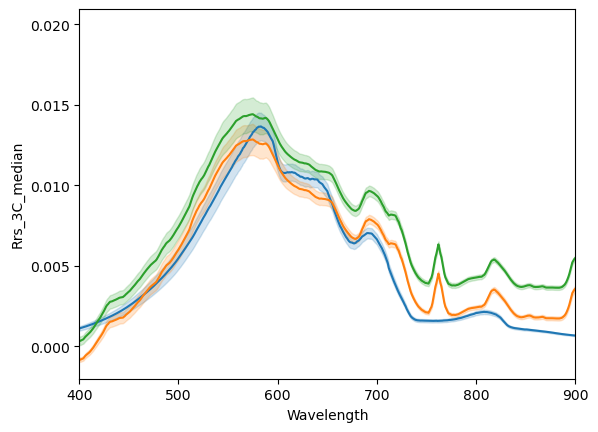

In [50]:
sns.lineplot(data=log_Rrs.reset_index(), x='Wavelength', y='Rrs_3C_median', errorbar='se')
sns.lineplot(data=log_Rrs.reset_index(), x='Wavelength', y='Rrs_median', errorbar='se')
sns.lineplot(data=log_Rrs_standard.reset_index(), x='Wavelength', y='Rrs_median', errorbar='se')
plt.xlim(400, 900)

In [47]:
log_Rrs_standard = uniform_grid_spectra_multi(log_re, spect_wavelengths=spect_wavelengths, resample_to_SDs=False, 
                                     Rrs_method='standard')

In [ ]:
log_Rrs_standard

In [51]:
lib_path

'/Users/daa5@stir.ac.uk/Project/DALEC_processing/rrs_model_3C-master'